In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [19]:
xs=[170,176, 94, 70, 67, 44, 88,105,212, 37,240,233,116,213, 52, 22, 76,134,168, 12,172,168,159,153, 93,224, 26,147,101,136, 74, 58, 87,139, 80,108, 27, 55,118,140,114, 85,179,206,243, 80,116, 81,178,185,185,118,196,148, 41, 82, 22,168,104,167,142,226, 97,232]
ys=[174, 67, 10,190,250, 11, 50,122,146, 68, 58, 96,211, 17,192,179,140,126, 91,156,233,  3,148,127, 16, 56,213,198,235, 92,121, 68,233,251, 50,  0,240,121,237,146,119,147, 69,195, 99, 51,126,  7,197,  7,118,157,240, 78,106,103,204,202,171,212, 36,130,134,187]
path=[
         0,        37,        50,        11,        54,        44,        29,        53,        25,        13,        35,         2,         5,        31,        40,        30,        18,        55,         8,         3,        15,        41,         7,         9,        24,        49,        47,        42,        62,        43,        12,        56,        26,        59,        58,        51,        10,        60,        21,        45,        34,         6,         1,        17,        19,        22,        16,        27,        57,        28,        32,        39,        23,        61,        46,        14,         4,        36,        33,        38,        52,        20,        48,        63,
]

In [20]:
assert(len(xs)==64)
assert(len(ys)==64)
path_set=set(path)
assert(len(path_set)==64)

In [21]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

7816.391383816451


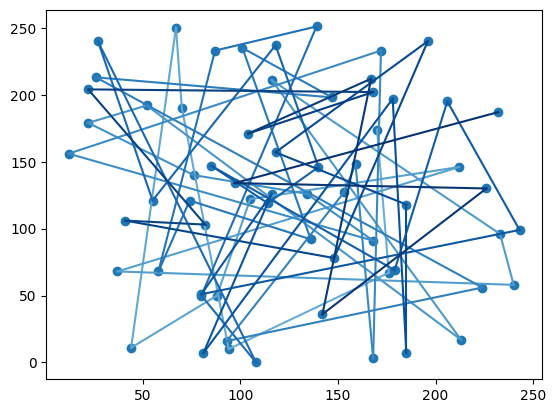

In [22]:
dist=sum([distance(xs[i],ys[i],xs[i+1],ys[i+1]) for i in range(len(path)-1)])
print(dist)
plt.clf()
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))
plt.show()

5019.25563123316


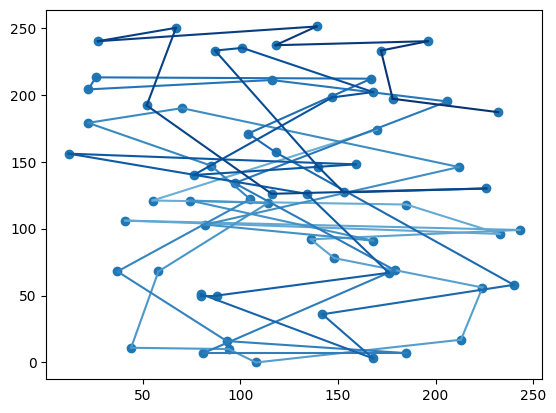

In [23]:
dist=sum([distance(xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]) for i in range(len(path)-1)])
print(dist)
plt.clf()
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]],color=cm.Blues(i/len(path)/2+0.5))
plt.show()

In [24]:
for i in range(1,len(path)-1):
    for j in range(1,i):
        # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
        d1=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
        )
        # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
        d2=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
        )
        if d1>d2:
            print(f"{path[i]}{xs[path[i]],ys[path[i]]} <-> {path[j]}{xs[path[j]],ys[path[j]]}: {d1} -> {d2}")

50(185, 118) <-> 37(55, 121): 439.4961685690985 -> 237.7211766445038
11(233, 96) <-> 37(55, 121): 501.7217980912576 -> 303.61906023815493
11(233, 96) <-> 50(185, 118): 427.8978813362818 -> 324.24617942746835
54(41, 106) <-> 50(185, 118): 577.217616944769 -> 326.61281803657215
54(41, 106) <-> 11(233, 96): 639.4432464669281 -> 154.93944145441807
44(243, 99) <-> 37(55, 121): 566.0100208943823 -> 272.247297932749
44(243, 99) <-> 50(185, 118): 492.18610413940644 -> 399.6930115691463
44(243, 99) <-> 11(233, 96): 554.4117336615656 -> 552.4967083111142
44(243, 99) <-> 54(41, 106): 703.7314692700527 -> 106.46634464440795
29(136, 92) <-> 50(185, 118): 308.5039423157287 -> 298.6386248256574
29(136, 92) <-> 11(233, 96): 370.72957183788776 -> 248.82203907882584
29(136, 92) <-> 54(41, 106): 520.049307446375 -> 517.0353106984619
29(136, 92) <-> 44(243, 99): 435.0177946410124 -> 193.31940892713973
53(148, 78) <-> 11(233, 96): 342.62100612321615 -> 303.1738633694179
53(148, 78) <-> 54(41, 106): 491.940

In [25]:
def linerSearchSwap():
    for i in range(1,len(path)-1):
        for j in range(1,i):
            # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
            d1=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
            )
            # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
            d2=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
            )
            if d1>d2:
                path[i],path[j]=path[j],path[i]